<font color = 'red'>
<h1>Load Libraries<h1>

In [63]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn import metrics
from patsy import dmatrices
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# <a id='7'>Import data - load data from Statsmodels api<a/>

In [2]:
df = sm.datasets.fair.load_pandas().data
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [4]:
print('Affairs data - rows:' , df.shape[0] ,'columns:' , df.shape[1])

Affairs data - rows: 6366 columns: 9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
dtypes: float64(9)
memory usage: 447.7 KB


In [ ]:
# we can see data has no null values but we can still double check

In [7]:
#check for nulls
df.isna().any().any()

False

In [11]:
# Checking for duplicates
df.duplicated().any()

True

In [ ]:
# note: data has duplicate values , thus we need to drop them

In [ ]:
df.drop_duplicates(inplace=True)

In [13]:
# Lets Make columns look a bit more organised
cols = [col.capitalize() for col in df.columns]
df.columns = cols

In [14]:
# Check results
df.columns

Index(['Rate_marriage', 'Age', 'Yrs_married', 'Children', 'Religious', 'Educ',
       'Occupation', 'Occupation_husb', 'Affairs'],
      dtype='object')

# <a id='7'>EDA<a/>

In [ ]:
# Checking the age distribution

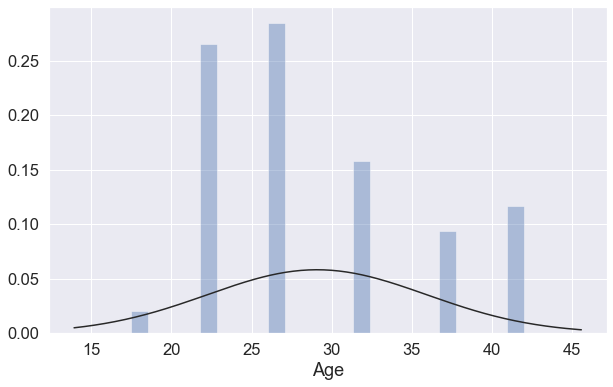

In [19]:
sns.set(font_scale=1.5) 
fig, ax = plt.subplots(figsize=(10, 6))
sns.distplot(a=df.Age, kde=False, fit=norm)

In [ ]:
# Converting age into integer

In [21]:
df['Age'].dtype

dtype('float64')

In [23]:
df['Age'] = df['Age'].astype('int')

In [24]:
# Check results
df['Age'].dtype

dtype('int64')

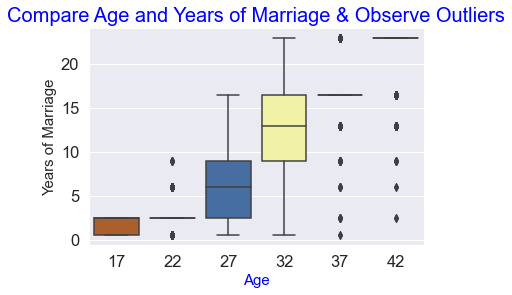

In [44]:
sns.boxplot(x="Age", y="Yrs_married" , data = df , palette="Accent_r");
plt.title("Compare Age and Years of Marriage & Observe Outliers",fontsize = 20,color='blue')
plt.xlabel('Age',fontsize = 15,color='blue')
plt.ylabel('Years of Marriage',fontsize = 15)
plt.show()

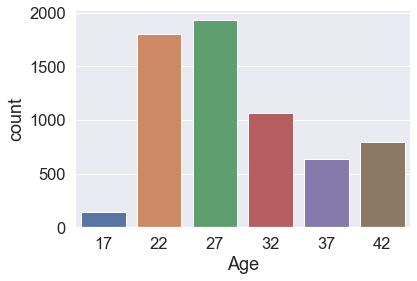

In [26]:
# Plotting Age Variable in dataframe
f,ax = plt.subplots(figsize = (10,7))
sns.countplot(x='Age' , data = df)
plt.title('Age Distibution of People' , fontsize=15 , color = 'blue')
plt.xlabel('Age')
plt.ylabel('Total Count of Age' , fontsize = 15)
plt.show()

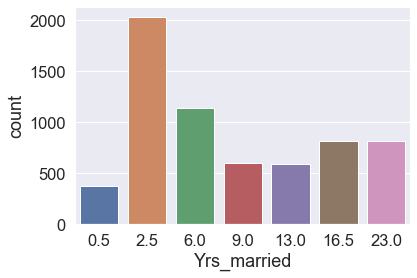

In [39]:
sns.countplot(x='Yrs_married' , data = df)

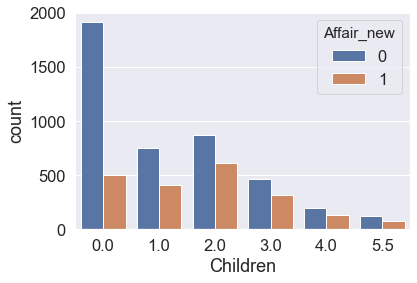

In [41]:
sns.countplot(x='Children' , hue = 'Affair_new' , data = df)

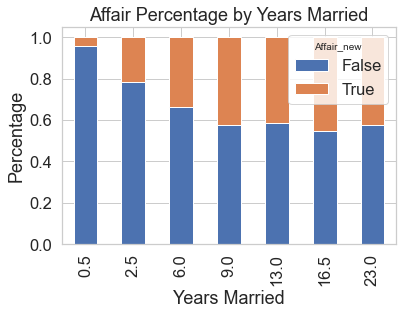

In [85]:
affair_yrs_married = pd.crosstab(df.Yrs_married, df.Affair_new.astype(bool))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Affair Percentage by Years Married')
plt.xlabel('Years Married')
plt.ylabel('Percentage')
plt.show()

In [29]:
df['Affairs'].value_counts

<bound method IndexOpsMixin.value_counts of 0       0.111111
1       3.230769
2       1.400000
3       0.727273
4       4.666666
          ...   
6361    0.000000
6362    0.000000
6363    0.000000
6364    0.000000
6365    0.000000
Name: Affairs, Length: 6366, dtype: float64>

In [33]:
# # Adding 'affair' column: 1 represents having affair, 0 doesn't
df['Affair_new'] = df.Affairs.map(lambda x : x > 0).astype(int)

In [34]:
# Check results
df.head()

,Rate_marriage,Age,Yrs_married,Children,Religious,Educ,Occupation,Occupation_husb,Affairs,Affair_new
0,3.0,32,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [35]:
df.Affair_new.unique()

array([1, 0])

In [38]:
df.groupby('Affairs').mean()

,Rate_marriage,Age,Yrs_married,Children,Religious,Educ,Occupation,Occupation_husb,Affair_new
Affairs,,,,,,,,,
0.000000,4.329701,28.376072,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.0
0.043478,3.681818,41.090909,23.000000,3.272727,2.409091,14.500000,3.681818,4.363636,1.0
0.060606,4.318182,33.363636,16.500000,2.931818,2.590909,13.727273,3.363636,4.227273,1.0
0.076923,3.160000,31.800000,13.000000,1.840000,2.280000,13.960000,3.480000,3.640000,1.0
0.111111,3.862069,29.413793,9.000000,1.655172,2.172414,15.206897,3.620690,4.137931,1.0
...,...,...,...,...,...,...,...,...,...
25.599991,3.000000,22.000000,2.500000,0.500000,2.000000,13.000000,2.500000,2.500000,1.0
26.879990,3.000000,23.666667,2.500000,0.666667,1.666667,13.666667,4.000000,3.000000,1.0
38.399994,3.000000,27.000000,2.500000,0.000000,1.000000,14.000000,4.000000,6.000000,1.0


# <a id='7'>Modeling<a/>

In [51]:
y, X = dmatrices('Affair_new ~ Rate_marriage + Age + Yrs_married + Children + Religious + Educ + C(Occupation) + C(Occupation_husb)', df, return_type="dataframe")
print(X.columns)


Index(['Intercept', 'C(Occupation)[T.2.0]', 'C(Occupation)[T.3.0]',
       'C(Occupation)[T.4.0]', 'C(Occupation)[T.5.0]', 'C(Occupation)[T.6.0]',
       'C(Occupation_husb)[T.2.0]', 'C(Occupation_husb)[T.3.0]',
       'C(Occupation_husb)[T.4.0]', 'C(Occupation_husb)[T.5.0]',
       'C(Occupation_husb)[T.6.0]', 'Rate_marriage', 'Age', 'Yrs_married',
       'Children', 'Religious', 'Educ'],
      dtype='object')


# <a id='7'># Renaming columns<a/>

In [52]:
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
                       'C(occupation)[T.3.0]':'occ_3', 
                        'C(occupation)[T.4.0]':'occ_4', 
                        'C(occupation)[T.5.0]':'occ_5', 
                        'C(occupation)[T.6.0]':'occ_6', 
                        'C(occupation_husb)[T.2.0]':'occ_husb_2', 
                        'C(occupation_husb)[T.3.0]':'occ_husb_3', 
                        'C(occupation_husb)[T.4.0]':'occ_husb_4', 
                        'C(occupation_husb)[T.5.0]':'occ_husb_5', 
                        'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [53]:
y = np.ravel(y)

# <a id='7'>Splitting data<a/>

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train , x_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state = 42)

# <a id='7'>Import Logistic Regression Model<a/>

In [58]:
from sklearn.linear_model import LogisticRegression

In [61]:
model = LogisticRegression(random_state=42)
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# <a id='7'>Fitting the model<a/>

In [64]:
model.fit(X_train , y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# <a id='7'>Predicting the model<a/>

In [65]:
y_pred = model.predict(x_test)

# <a id='7'>Confusion Matrix<a/>

In [67]:
from sklearn.metrics import confusion_matrix

In [68]:
cm = confusion_matrix(y_test , y_pred)
print(cm)

[[759  90]
 [255 170]]


# <a id='7'>Check Model Accuracy and Print classification report<a/>

In [76]:
print(metrics.accuracy_score(y_test , y_pred).round(2))

0.73


In [ ]:
# Note we can manually check the accuracy the way by calculating from the confusion matrix

In [72]:
(759+170) / (759+170+250+90)

0.7320724980299448

In [79]:
print(metrics.classification_report(y_test , y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.89      0.81       849
         1.0       0.65      0.40      0.50       425

    accuracy                           0.73      1274
   macro avg       0.70      0.65      0.66      1274
weighted avg       0.72      0.73      0.71      1274



# <a id='7'>K-Fold Cross-Validation<a/>

In [77]:
from sklearn.model_selection import cross_val_score

In [81]:
accuracies = cross_val_score(estimator = model , X = X_train , y = y_train , cv=10)
print('Accuracy : {:.2f} %'.format(accuracies.mean() * 100))
print('Standard Deviation : {:.2f} %'.format(accuracies.std() * 100))

Accuracy : 72.45 %
Standard Deviation : 1.56 %


# <a id='7'>Note we can always improve the model performance by feature Engineering or hyper parameter optimization<a/>

# Done